In [32]:
from statistics import mean
from time import time
import numpy as np
import matplotlib.pyplot as plt

from core.fileProcessing.Loader import LoadMedDataset
from core.basics.Vectorizer import Vectorizer
from core.boolean.BooleanModel import BooleanModel
from core.vectorial.VectorialModel import VectorialModel
from core.probabilistic.ProbabilisticModel import ProbabilisticModel

In [33]:
documents, consults = LoadMedDataset("./Test Collections/Med/")

In [34]:
def evaluate_model(relevant_fun, consult_fun, beta2=2):
    precision = []
    recall = []
    f = []
    f1 = []
    fallout = []
    tme = []
    mp = []
    
    for q in consults:
        relevant = relevant_fun(q)
        
        begTime = time()
        recovered = consult_fun(q)
        timeElapsed = time() - begTime
        
        founded, s = 0, 0
        for i, d in enumerate(recovered):
            if d.id in relevant:
                founded += 1
                s += founded / (i + 1)
        if len(relevant) > 0: mp.append(s / len(relevant))

        rr = sum((1 if i.id in relevant else 0 for i in recovered))
        ri = len(recovered) - rr
        nr = len(relevant) - rr
        ni = len(documents) - ri - nr - rr
        
        if len(recovered) > 0: p = rr / (rr + ri)
        else: p = 1 if len(relevant) == 0 else 0
        precision.append(p)
            
        if len(relevant) > 0: r = rr / (rr + nr)
        else: r = 1 if len(recovered) == 0 else 0
        recall.append(r)
        
        if p > 0 and r > 0: 
            f.append((1 + beta2) / (1 / p + beta2 / r))
            f1.append(2 / (1 / p + 1 / r))
            
        if ri + ni > 0:
            fallout.append(ri / (ri + ni))
        
        tme.append(timeElapsed)
    return precision, recall, f, \
           f1, fallout, tme, mp

# Boolean model

In [35]:
booleanModel = BooleanModel(documents)

In [36]:
relevant_fun = lambda q: [i[1] for i in q.relevant]
consult_fun = booleanModel.Consult
p, r, f, f1, fl, t, _  = evaluate_model(relevant_fun, consult_fun)

print("Precision:", mean(p))
print("Recall:", mean(r))
print("F metric:", mean(f))
print("F1 metric:", mean(f1))
print("Fallout:", mean(fl))
print("Time:", mean(t), "seg")


Precision: 0.09555555555555556
Recall: 0.01856060606060606
F metric: 0.2435264428351986
F1 metric: 0.2897245963912631
Fallout: 6.706908115358821e-05
Time: 0.05990163485209147 seg


In [39]:
relevant_fun = lambda q: [i[1] for i in q.relevant]
consult_fun = lambda q: booleanModel.Consult(q, relaxed=True)
_, _, _, _, _, t, m  = evaluate_model(relevant_fun, consult_fun)

print("Time:", mean(t), "seg")
print("Mean Average Precision:", mean(m))

Time: 0.1824497699737549 seg
Mean Average Precision: 0.37959399066292554


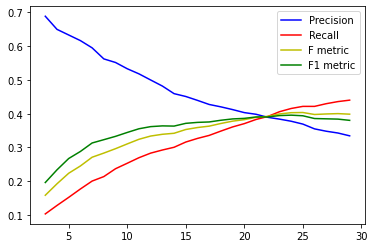

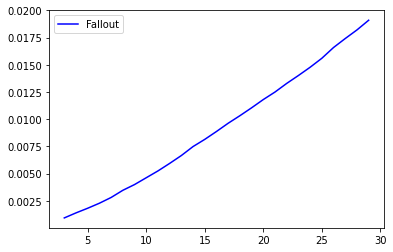

In [41]:
x = np.arange(3, 30)
ps, rs, fs, f1s, fls = [], [], [], [], []

for i in x:
    relevant_fun = lambda q: [i[1] for i in q.relevant]
    consult_fun = lambda q: booleanModel.Consult(q, size=i, relaxed=True)
    p, r, f, f1, fl, _, _  = evaluate_model(relevant_fun, consult_fun)
    ps.append(mean(p))
    rs.append(mean(r))
    fs.append(mean(f))
    f1s.append(mean(f1))
    fls.append(mean(fl))

plt.plot(x, ps, 'b', label='Precision')
plt.plot(x, rs, 'r', label='Recall')
plt.plot(x, fs, 'y', label='F metric')
plt.plot(x, f1s, 'g', label='F1 metric')
plt.legend()

plt.figure()
plt.plot(x, fls, 'b', label='Fallout')
plt.legend()
plt.show()

In [43]:
relevant_fun = lambda q: [i[1] for i in q.relevant]
consult_fun = lambda q: booleanModel.Consult(q, size=23, relaxed=True)
p, r, f, f1, fl, t, _  = evaluate_model(relevant_fun, consult_fun)

print("Precision:", mean(p))
print("Recall:", mean(r))
print("F metric:", mean(f))
print("F1 metric:", mean(f1))
print("Fallout:", mean(fl))
print("Time:", mean(t), "seg")

Precision: 0.38405797101449274
Recall: 0.4059163975778169
F metric: 0.3993083696862148
F1 metric: 0.39451460133641014
Fallout: 0.014015763406808377
Time: 0.1850713570912679 seg


# Vectorial model

In [44]:
vectorialModel = VectorialModel(documents)

In [45]:
relevant_fun = lambda q: [i[1] for i in q.relevant]
consult_fun = vectorialModel.Consult
_, _, _, _, _, t, m  = evaluate_model(relevant_fun, consult_fun)

print("Time:", mean(t), "seg")
print("Mean Average Precision:", mean(m))

Time: 0.02133337656656901 seg
Mean Average Precision: 0.5197006823389292


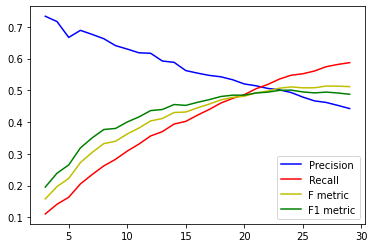

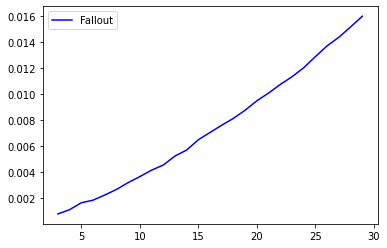

In [47]:
x = np.arange(3, 30)
ps, rs, fs, f1s, fls = [], [], [], [], []

for i in x:
    relevant_fun = lambda q: [i[1] for i in q.relevant]
    consult_fun = lambda q: vectorialModel.Consult(q, i)
    p, r, f, f1, fl, _, _  = evaluate_model(relevant_fun, consult_fun)
    ps.append(mean(p))
    rs.append(mean(r))
    fs.append(mean(f))
    f1s.append(mean(f1))
    fls.append(mean(fl))

plt.plot(x, ps, 'b', label='Precision')
plt.plot(x, rs, 'r', label='Recall')
plt.plot(x, fs, 'y', label='F metric')
plt.plot(x, f1s, 'g', label='F1 metric')
plt.legend()

plt.figure()
plt.plot(x, fls, 'b', label='Fallout')
plt.legend()
plt.show()

In [48]:
relevant_fun = lambda q: [i[1] for i in q.relevant]
consult_fun = lambda q: vectorialModel.Consult(q, 22)
p, r, f, f1, fl, t, _  = evaluate_model(relevant_fun, consult_fun)

print("Precision:", mean(p))
print("Recall:", mean(r))
print("F metric:", mean(f))
print("F1 metric:", mean(f1))
print("Fallout:", mean(fl))
print("Time:", mean(t), "seg")

Precision: 0.5060606060606061
Recall: 0.5184640355542405
F metric: 0.49775871260620247
F1 metric: 0.4942120336096295
Fallout: 0.010746482057597165
Time: 0.020856142044067383 seg


In [49]:
relevant_fun = lambda q: [i[1] for i in q.relevant]
def consult_fun(q, size=22, steps=10):
    remarkable = vectorialModel.Consult(q, size)
    relevant = relevant_fun(q)
    for _ in range(steps):
        retro_relevant = [d.id for d in remarkable if d.id in relevant]
        retro_irrelevant = [d.id for d in remarkable if d.id not in relevant]
        remarkable = vectorialModel.ReConsult(q, retro_relevant, retro_irrelevant, size)
    return remarkable

p, r, f, f1, fl, t, _  = evaluate_model(relevant_fun, consult_fun)

print("Precision:", mean(p))
print("Recall:", mean(r))
print("F metric:", mean(f))
print("F1 metric:", mean(f1))
print("Fallout:", mean(fl))
print("Time:", mean(t), "seg")

Precision: 0.65
Recall: 0.6483878770872774
F metric: 0.6283303659905827
F1 metric: 0.6265946603690781
Fallout: 0.0075975965841313725
Time: 0.25560113588968914 seg


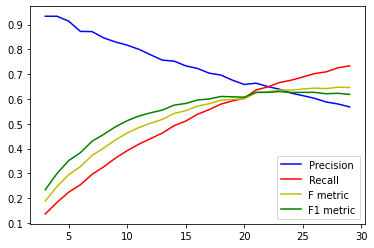

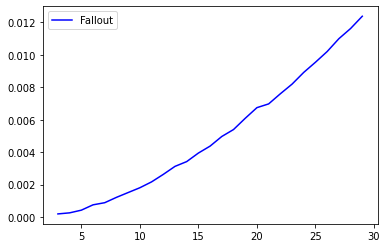

In [50]:
x = np.arange(3, 30)
ps, rs, fs, f1s, fls = [], [], [], [], []
relevant_fun = lambda q: [i[1] for i in q.relevant]
def consult_fun(q, size=7, steps=10):
    remarkable = vectorialModel.Consult(q, size)
    relevant = relevant_fun(q)
    for _ in range(steps):
        retro_relevant = [d.id for d in remarkable if d.id in relevant]
        retro_irrelevant = [d.id for d in remarkable if d.id not in relevant]
        remarkable = vectorialModel.ReConsult(q, retro_relevant, retro_irrelevant, size)
    return remarkable

for i in x:
    wrapper = lambda q: consult_fun(q, size=int(i), steps=10)
    p, r, f, f1, fl, _, _  = evaluate_model(relevant_fun, wrapper)
    ps.append(mean(p))
    rs.append(mean(r))
    fs.append(mean(f))
    f1s.append(mean(f1))
    fls.append(mean(fl))

plt.plot(x, ps, 'b', label='Precision')
plt.plot(x, rs, 'r', label='Recall')
plt.plot(x, fs, 'y', label='F metric')
plt.plot(x, f1s, 'g', label='F1 metric')
plt.legend()

plt.figure()
plt.plot(x, fls, 'b', label='Fallout')
plt.legend()
plt.show()

# Probabilistic model

In [51]:
probabilisticModel = ProbabilisticModel(documents)

In [52]:
relevant_fun = lambda q: [i[1] for i in q.relevant]
consult_fun = probabilisticModel.Consult
_, _, _, _, _, t, m  = evaluate_model(relevant_fun, consult_fun)

print("Time:", mean(t), "seg")
print("Mean Average Precision:", mean(m))

Time: 0.0758921225865682 seg
Mean Average Precision: 0.46697981630034924


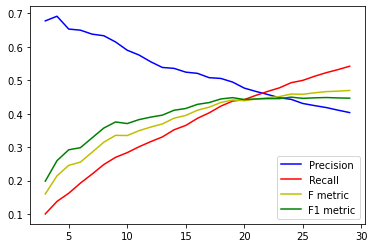

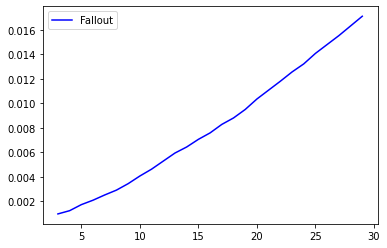

In [53]:
x = np.arange(3, 30)
ps, rs, fs, f1s, fls = [], [], [], [], []

for i in x:
    relevant_fun = lambda q: [i[1] for i in q.relevant]
    consult_fun = lambda q: probabilisticModel.Consult(q, i)
    p, r, f, f1, fl, _, _  = evaluate_model(relevant_fun, consult_fun)
    ps.append(mean(p))
    rs.append(mean(r))
    fs.append(mean(f))
    f1s.append(mean(f1))
    fls.append(mean(fl))

plt.plot(x, ps, 'b', label='Precision')
plt.plot(x, rs, 'r', label='Recall')
plt.plot(x, fs, 'y', label='F metric')
plt.plot(x, f1s, 'g', label='F1 metric')
plt.legend()

plt.figure()
plt.plot(x, fls, 'b', label='Fallout')
plt.legend()
plt.show()

In [54]:
relevant_fun = lambda q: [i[1] for i in q.relevant]
consult_fun = lambda q: probabilisticModel.Consult(q, 22)
p, r, f, f1, fl, t, _  = evaluate_model(relevant_fun, consult_fun)

print("Precision:", mean(p))
print("Recall:", mean(r))
print("F metric:", mean(f))
print("F1 metric:", mean(f1))
print("Fallout:", mean(fl))
print("Time:", mean(t), "seg")

Precision: 0.4575757575757576
Recall: 0.46680478105440626
F metric: 0.44818234538456464
F1 metric: 0.44520157791679116
Fallout: 0.011801586808332563
Time: 0.0770514170328776 seg


In [55]:
relevant_fun = lambda q: [i[1] for i in q.relevant]
consult_fun = lambda q: probabilisticModel.Consult(q, size=20, retroalimentation=10)
_, _, _, _, _, t, _  = evaluate_model(relevant_fun, consult_fun)

print("Time:", mean(t), "seg")

Time: 0.6804824590682983 seg


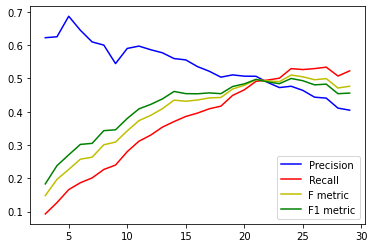

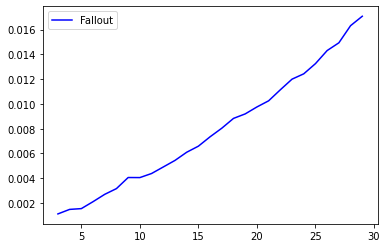

In [57]:
x = np.arange(3, 30)
ps, rs, fs, f1s, fls = [], [], [], [], []

for i in x:
    relevant_fun = lambda q: [i[1] for i in q.relevant]
    consult_fun = lambda q: probabilisticModel.Consult(q, size=int(i), retroalimentation=5)
    p, r, f, f1, fl, _, _  = evaluate_model(relevant_fun, consult_fun)
    ps.append(mean(p))
    rs.append(mean(r))
    fs.append(mean(f))
    f1s.append(mean(f1))
    fls.append(mean(fl))

plt.plot(x, ps, 'b', label='Precision')
plt.plot(x, rs, 'r', label='Recall')
plt.plot(x, fs, 'y', label='F metric')
plt.plot(x, f1s, 'g', label='F1 metric')
plt.legend()

plt.figure()
plt.plot(x, fls, 'b', label='Fallout')
plt.legend()
plt.show()

In [58]:
relevant_fun = lambda q: [i[1] for i in q.relevant]
consult_fun = lambda q: probabilisticModel.Consult(q, 22, 10)
p, r, f, f1, fl, t, _  = evaluate_model(relevant_fun, consult_fun)

print("Precision:", mean(p))
print("Recall:", mean(r))
print("F metric:", mean(f))
print("F1 metric:", mean(f1))
print("Fallout:", mean(fl))
print("Time:", mean(t), "seg")

Precision: 0.47575757575757577
Recall: 0.4806445111069049
F metric: 0.4800245732212114
F1 metric: 0.477596104537485
Fallout: 0.011404092691023559
Time: 0.66839071114858 seg


# Conclusions

In [59]:
names = []
precision = []
recall = []
fmetric = []
f1metric = []
fallout = []
tme = []
mp = []

In [60]:
booleanModel = BooleanModel(documents)
relevant_fun = lambda q: [i[1] for i in q.relevant]
consult_fun = booleanModel.Consult
p, r, f, f1, fl, t, _  = evaluate_model(relevant_fun, consult_fun)

names.append('Boolean Model')
precision.append(mean(p))
recall.append(mean(r))
fmetric.append(mean(f))
f1metric.append(mean(f1))
fallout.append(mean(fl))
tme.append(mean(t))
mp.append(None)

In [61]:
relevant_fun = lambda q: [i[1] for i in q.relevant]
consult_fun = lambda q: booleanModel.Consult(q, relaxed=True)
_, _, _, _, _, _, m  = evaluate_model(relevant_fun, consult_fun)
consult_fun = lambda q: booleanModel.Consult(q, size=22, relaxed=True)
p, r, f, f1, fl, t, _  = evaluate_model(relevant_fun, consult_fun)
names.append('Boolean Model (relaxed)')
precision.append(mean(p))
recall.append(mean(r))
fmetric.append(mean(f))
f1metric.append(mean(f1))
fallout.append(mean(fl))
tme.append(mean(t))
mp.append(mean(m))

In [62]:
vectorialModel = VectorialModel(documents)
relevant_fun = lambda q: [i[1] for i in q.relevant]
consult_fun = vectorialModel.Consult
_, _, _, _, _, _, m  = evaluate_model(relevant_fun, consult_fun)
consult_fun = lambda q: vectorialModel.Consult(q, 22)
p, r, f, f1, fl, t, _  = evaluate_model(relevant_fun, consult_fun)

names.append('Vectorial Model (classic)')
precision.append(mean(p))
recall.append(mean(r))
fmetric.append(mean(f))
f1metric.append(mean(f1))
fallout.append(mean(fl))
tme.append(mean(t))
mp.append(mean(m))

In [63]:
vectorialModel = VectorialModel(documents)
relevant_fun = lambda q: [i[1] for i in q.relevant]
def consult_fun(q, size=22, steps=10):
    remarkable = vectorialModel.Consult(q, size)
    relevant = relevant_fun(q)
    for _ in range(steps):
        retro_relevant = [d.id for d in remarkable if d.id in relevant]
        retro_irrelevant = [d.id for d in remarkable if d.id not in relevant]
        remarkable = vectorialModel.ReConsult(q, retro_relevant, retro_irrelevant, size)
    return remarkable

p, r, f, f1, fl, t, _  = evaluate_model(relevant_fun, consult_fun)

names.append('Vectorial Model (with retroalimentation)')
precision.append(mean(p))
recall.append(mean(r))
fmetric.append(mean(f))
f1metric.append(mean(f1))
fallout.append(mean(fl))
tme.append(mean(t))
mp.append(None)

In [64]:
probabilisticModel = ProbabilisticModel(documents)
relevant_fun = lambda q: [i[1] for i in q.relevant]
consult_fun = probabilisticModel.Consult
_, _, _, _, _, _, m  = evaluate_model(relevant_fun, consult_fun)
relevant_fun = lambda q: [i[1] for i in q.relevant]
consult_fun = lambda q: probabilisticModel.Consult(q, 22)
p, r, f, f1, fl, t, _  = evaluate_model(relevant_fun, consult_fun)

names.append('Probabilistic Model (classic)')
precision.append(mean(p))
recall.append(mean(r))
fmetric.append(mean(f))
f1metric.append(mean(f1))
fallout.append(mean(fl))
tme.append(mean(t))
mp.append(mean(m))

In [65]:
probabilisticModel = ProbabilisticModel(documents)
relevant_fun = lambda q: [i[1] for i in q.relevant]
consult_fun = lambda q: probabilisticModel.Consult(q, 22, 20)
p, r, f, f1, fl, t, _  = evaluate_model(relevant_fun, consult_fun)

names.append('Probabilistic Model (with retroalimentation)')
precision.append(mean(p))
recall.append(mean(r))
fmetric.append(mean(f))
f1metric.append(mean(f1))
fallout.append(mean(fl))
tme.append(mean(t))
mp.append(None)

In [66]:
from IPython.display import display
import pandas as pd
  
# creating a DataFrame
dct = {'Model' : names,
        'Precision' : precision,
        'Recall' : recall,
        'F metric': fmetric,
        'F1 metric': f1metric,
        'Fallout': fallout,
        'Time': tme,
        'Medium Average Precision': mp
       }
df = pd.DataFrame(dct)
  
# displaying the DataFrame
display(df)

,Model,Precision,Recall,F metric,F1 metric,Fallout,Time,Medium Average Precision
0,Boolean Model,0.095556,0.018561,0.243526,0.289725,0.000067,0.059382,NaN
1,Boolean Model (relaxed),0.389394,0.391778,0.392189,0.390509,0.013289,0.186724,0.379562
2,Vectorial Model (classic),0.506061,0.518464,0.497759,0.494212,0.010746,0.020193,0.519701
3,Vectorial Model (with retroalimentation),0.650000,0.648388,0.628330,0.626595,0.007598,0.265164,NaN
4,Probabilistic Model (classic),0.457576,0.466805,0.448182,0.445202,0.011802,0.075544,0.466980
5,Probabilistic Model (with retroalimentation),0.448485,0.455712,0.453588,0.450774,0.011999,1.387827,NaN
